# BIA-652 Assignment 1. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name: Tejas Kane

In [1]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [2]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')
df

OSError: [Errno 22] Invalid argument: 'C:\\Users\\mit13\\Desktop\\First Semester\\Bia 652 Multivariate\\data\\Icon\r'

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [ ]:
sum_of_Wscore_Lscore = df['Wscore'] + df['Lscore']
df['total_score'] = sum_of_Wscore_Lscore
df


__Q2: What is the min, max, average, and median of the total_score?__ 

In [ ]:
min = df['total_score'].min()
max = df['total_score'].max()
average= df['total_score'].mean(axis=0)
median = df['total_score'].median(axis=0)
print('min =',min)
print('max =',max)
print('average =',average)
print('median =',median)




__Q3: Find the average total score for each year (season).__ 

In [6]:
average_total_score=df.groupby('Season')[['total_score']].mean().rename(columns={'total_score' : 'avg_total_score'})
average_total_score



,avg_total_score
Season,
1985,138.583356
1986,138.447528
1987,144.764496
1988,147.470796
1989,151.259351
1990,149.680099
1991,152.791171
1992,147.136661
1993,146.810648


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


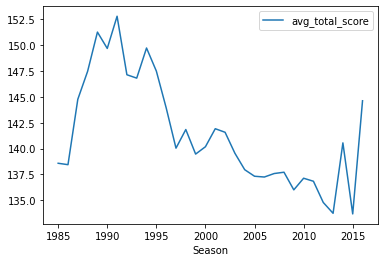

In [7]:
average_total_score.plot()

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [8]:
df['Blowout_games'] = df['Wscore'].sub(df['Lscore'])
df


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score,Blowout_games
0,1985,20,1228,81,1328,64,N,0,145,17
1,1985,25,1106,77,1354,70,H,0,147,7
2,1985,25,1112,63,1223,56,H,0,119,7
3,1985,25,1165,70,1432,54,H,0,124,16
4,1985,25,1192,86,1447,74,H,0,160,12
...,...,...,...,...,...,...,...,...,...,...
145284,2016,132,1114,70,1419,50,N,0,120,20
145285,2016,132,1163,72,1272,58,N,0,130,14
145286,2016,132,1246,82,1401,77,N,1,159,5
145287,2016,132,1277,66,1345,62,N,0,128,4


In [9]:
def win_margin(x):
  return 100*sum(x>=30)/len(x)

df.groupby(['Season']).Blowout_games.agg(win_margin).idxmax()

1991

**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [10]:
long_df = pd.melt(df, id_vars=['Wteam','Season'], value_vars=['Wscore','Lscore'], var_name ='Win/Lose', value_name= 'Score').rename(columns={'Wteam':'TeamID'})
long_df


,TeamID,Season,Win/Lose,Score
0,1228,1985,Wscore,81
1,1106,1985,Wscore,77
2,1112,1985,Wscore,63
3,1165,1985,Wscore,70
4,1192,1985,Wscore,86
...,...,...,...,...
290573,1114,2016,Lscore,50
290574,1163,2016,Lscore,58
290575,1246,2016,Lscore,77
290576,1277,2016,Lscore,62


In [88]:
df2 = long_df.groupby(['TeamID','Season'], as_index = False)[['Score']].mean()
df2

,TeamID,Season,Score
0,1101,2014,78.250000
1,1101,2015,71.357143
2,1101,2016,74.444444
3,1102,1985,66.000000
4,1102,1986,63.333333
...,...,...,...
10167,1464,2012,64.250000
10168,1464,2013,67.964286
10169,1464,2014,70.125000
10170,1464,2015,74.875000


In [89]:
df2.columns

Index(['TeamID', 'Season', 'Score'], dtype='object')

In [92]:
df3 = df2[df2.TeamID == 1464]

In [93]:
df3.head()

,TeamID,Season,Score
10140,1464,1985,68.062500
10141,1464,1986,64.150000
10142,1464,1987,72.750000
10143,1464,1988,60.750000
10144,1464,1989,69.666667


In [94]:
import matplotlib.pyplot as plt

In [95]:
X = df3.Season
Y =df3.Score

Text(0, 0.5, 'Score')

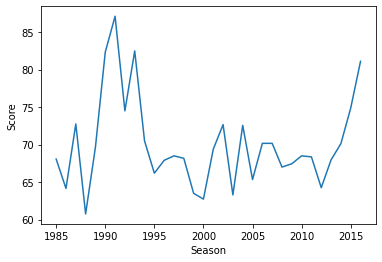

In [96]:
plt.plot(X, Y)
plt.xlabel('Season')
plt.ylabel('Score')